<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [251]:
##Import Dataset
import numpy as np
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [252]:
##Normalize by dividing each test set by its max value
for dataset in [X_train, y_train, X_test, y_test]:
    dataset = dataset/np.amax(dataset)

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [267]:
def boston_NN(dataset, X_train, X_test):
    X_train = X_train
    X_test = X_test
    ##Build Model
    dataset = Sequential()
    dataset.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
    dataset.add(Dropout(0.4))
    dataset.add(Dense(16, activation='sigmoid'))
    dataset.add(Dropout(0.2))
    dataset.add(Dense(16, activation='sigmoid'))
    dataset.add(Dropout(0.2))
    dataset.add(Dense(16, activation='sigmoid'))
    dataset.add(Dense(1, activation='sigmoid'))
    #Complile Model
    dataset.compile(loss='mean_squared_error',
                   optimizer='adam',
                   metrics=['mae'])
    dataset.summary()
    #Train model
    history = dataset.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=.1, verbose=False)
    scores = dataset.evaluate(X_test, y_test)
    return scores

In [268]:
X_train.shape

(404, 14)

In [269]:
scores = boston_NN(boston, X_train, X_test)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 16)                240       
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_29 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 16)              

In [270]:
print(f'{boston.metrics_names[1]}: {scores[1]}')

mean_absolute_error: 22.08230972290039


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


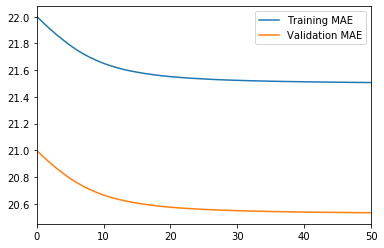

In [271]:
#Plot Training/Validation MAE
def plot_error():
    import matplotlib.pyplot as plt
    print(history.history.keys())
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.legend()
    plt.xlim([0, 50])
    
plot_error()

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
def run_lr():
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))
run_lr()

3.464185812406723


In [273]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
target = ['medv']

In [274]:
import pandas as pd
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)
y_train = pd.DataFrame(y_train, columns=target)
y_test = pd.DataFrame(y_test, columns=target)

In [275]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [276]:
for dset in [X_train, X_test]:
    dset['schools_good_or_bad'] = [1 if (ratio <= 10) else 0 for ratio in dset['ptratio']]

In [277]:
X_test.shape

(102, 14)

In [278]:
boston_NN(boston, X_train.values, X_test = X_test.values)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 16)                240       
_________________________________________________________________
dropout_30 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_144 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_32 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_145 (Dense)            (None, 16)              

[570.8328055587469, 22.081419]

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


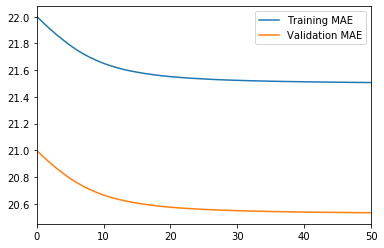

In [279]:
plot_error()

In [280]:
run_lr()

3.464185812406723


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [289]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [295]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train[1].shape
# for dset in [X_train, X_test]:
#     dset = encoder.fit_transform(dset)

(28, 28)

In [288]:
X_train.shape

(60000, 28, 28)

In [296]:

##Build Model
dataset = Sequential()
dataset.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
dataset.add(Dropout(0.4))
dataset.add(Dense(16, activation='sigmoid'))
dataset.add(Dropout(0.2))
dataset.add(Dense(16, activation='sigmoid'))
dataset.add(Dropout(0.2))
dataset.add(Dense(16, activation='sigmoid'))
dataset.add(Dense(1, activation='sigmoid'))
#Complile Model
dataset.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
dataset.summary()
#Train model
history = dataset.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=.1, verbose=False)
scores = dataset.evaluate(X_test, y_test)
return f'{boston.metrics_names[1]}: {scores[1]}'

In [297]:
fashion_NN(fashion_mnist, X_train, y_train)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 16)                464       
_________________________________________________________________
dropout_39 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_40 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_41 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_160 (Dense)            (None, 16)              

ValueError: Error when checking input: expected dense_157_input to have 2 dimensions, but got array with shape (60000, 28, 28)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.